In [1]:
import pandas as pd
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CD
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

CD_increased = list(top_5['#OTU ID'].values)
CD_increased_100 = list(top_100['#OTU ID'].values)
CD_increased_15 = list(top_15['#OTU ID'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
CD_decreased_100 = list(bottom_100['#OTU ID'].values)

In [3]:
#UC
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/UC/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

UC_increased = list(top_5['#OTU ID'].values)
UC_increased_100 = list(top_100['#OTU ID'].values)
UC_increased_15 = list(top_15['#OTU ID'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
UC_decreased_100 = list(bottom_100['#OTU ID'].values)

In [4]:
CD_UC_overlap = set(UC_increased_100).intersection(set(CD_increased_100))
UC_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/UC/res_df.tsv', sep = '\t')
UC_df["CI_95"] = UC_df["log2FoldChange"] + UC_df['lfcSE'] * 1.96
UC_df["CI_5" ] = UC_df["log2FoldChange"] - UC_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = UC_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
UC_df['Rank_in_UC'] = rankings
UC_df_filtered = UC_df[UC_df['#OTU ID'].isin(CD_UC_overlap)]
UC_df_filtered_new = UC_df_filtered[['#OTU ID', 'Rank_in_UC']]

CD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t')
CD_df["CI_95"] = CD_df["log2FoldChange"] + CD_df['lfcSE'] * 1.96
CD_df["CI_5" ] = CD_df["log2FoldChange"] - CD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CD_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
CD_df['Rank_in_CD'] = rankings
CD_df_filtered = CD_df[CD_df['#OTU ID'].isin(CD_UC_overlap)]
CD_df_filtered_new = CD_df_filtered[['#OTU ID', 'Rank_in_CD']]
CD_UC_df_merged = pd.merge(UC_df_filtered_new, CD_df_filtered_new, on='#OTU ID')
CD_UC_df_merged = CD_UC_df_merged.rename(columns={'#OTU ID': 'Microbes', 'Rank_in_UC': 'UC','Rank_in_CD':'CD'})
sorted_CD_UC_df_merged = CD_UC_df_merged.sort_values(by=['UC', 'CD'], ascending=True)
#sorted_CD_UC_df_merged.to_csv('table/CD_UC_overlap_increased.csv', index=False)

In [5]:
sorted_CD_UC_df_merged_long = pd.melt(sorted_CD_UC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')
sorted_CD_UC_df_merged_long = sorted_CD_UC_df_merged_long.rename(columns={'UC': 'Diseases', 'CD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1930738000.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_CD_UC_df_merged_long = pd.melt(sorted_CD_UC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')


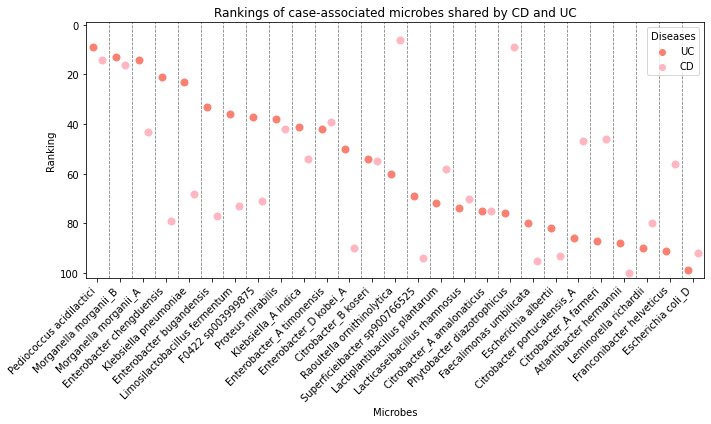

In [8]:
color_palette = ['salmon', 'lightpink']  # Change this to the desired colors

# Create a dot plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_CD_UC_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of case-associated microbes shared by CD and UC')
plt.legend(title='Diseases')
plt.xticks(rotation=45, ha='right')
plt.ylim(-1, 102)
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('Rankings_case_associated_CD_UC_dotplot.pdf', bbox_inches="tight")

In [11]:
CD_UC_overlap = set(UC_decreased_100).intersection(set(CD_decreased_100))
UC_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/UC/res_df.tsv', sep = '\t')
UC_df["CI_95"] = UC_df["log2FoldChange"] + UC_df['lfcSE'] * 1.96
UC_df["CI_5" ] = UC_df["log2FoldChange"] - UC_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = UC_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
UC_df['Rank_in_UC'] = rankings
UC_df_filtered = UC_df[UC_df['#OTU ID'].isin(CD_UC_overlap)]
UC_df_filtered_new = UC_df_filtered[['#OTU ID', 'Rank_in_UC']]

CD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t')
CD_df["CI_95"] = CD_df["log2FoldChange"] + CD_df['lfcSE'] * 1.96
CD_df["CI_5" ] = CD_df["log2FoldChange"] - CD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CD_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
CD_df['Rank_in_CD'] = rankings
CD_df_filtered = CD_df[CD_df['#OTU ID'].isin(CD_UC_overlap)]
CD_df_filtered_new = CD_df_filtered[['#OTU ID', 'Rank_in_CD']]
CD_UC_df_merged = pd.merge(UC_df_filtered_new, CD_df_filtered_new, on='#OTU ID')
CD_UC_df_merged = CD_UC_df_merged.rename(columns={'#OTU ID': 'Microbes','Rank_in_UC':'UC','Rank_in_CD':'CD'})
sorted_CD_UC_df_merged = CD_UC_df_merged.sort_values(by=['UC', 'CD'], ascending=True)
#sorted_CD_UC_df_merged.to_csv('table/CD_UC_overlap_increased.csv', index=False)
sorted_UC_CD_df_merged_long = pd.melt(sorted_CD_UC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')
sorted_UC_CD_df_merged_long = sorted_UC_CD_df_merged_long.rename(columns={'UC': 'Diseases','CD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/4235819703.py:25: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_UC_CD_df_merged_long = pd.melt(sorted_CD_UC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/833640371.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


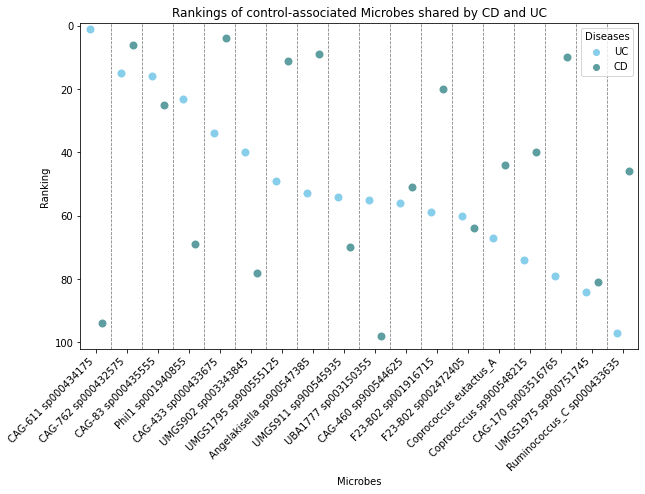

In [12]:
color_palette = ['skyblue', 'cadetblue']  # Change this to the desired colors
# Create a grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_UC_CD_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of control-associated Microbes shared by CD and UC')
plt.legend(title='Diseases',loc='best')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_control_associated_CD_UC_dots.pdf', bbox_inches="tight")

In [18]:
#CRC
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CRC/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

CRC_increased = list(top_5['#OTU ID'].values)
CRC_increased_100 = list(top_100['#OTU ID'].values)
CRC_increased_15 = list(top_15['#OTU ID'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
CRC_decreased_100 = list(bottom_100['#OTU ID'].values)

In [19]:
CD_CRC_overlap = set(CRC_increased_100).intersection(set(CD_increased_100))
CRC_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CRC/res_df.tsv', sep = '\t')
CRC_df["CI_95"] = CRC_df["log2FoldChange"] + CRC_df['lfcSE'] * 1.96
CRC_df["CI_5" ] = CRC_df["log2FoldChange"] - CRC_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CRC_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
CRC_df['Rank_in_CRC'] = rankings
CRC_df_filtered = CRC_df[CRC_df['#OTU ID'].isin(CD_CRC_overlap)]
CRC_df_filtered_new = CRC_df_filtered[['#OTU ID', 'Rank_in_CRC']]

CD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t')
CD_df["CI_95"] = CD_df["log2FoldChange"] + CD_df['lfcSE'] * 1.96
CD_df["CI_5" ] = CD_df["log2FoldChange"] - CD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CD_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
CD_df['Rank_in_CD'] = rankings
CD_df_filtered = CD_df[CD_df['#OTU ID'].isin(CD_CRC_overlap)]
CD_df_filtered_new = CD_df_filtered[['#OTU ID', 'Rank_in_CD']]
CD_CRC_df_merged = pd.merge(CRC_df_filtered_new, CD_df_filtered_new, on='#OTU ID')
CD_CRC_df_merged = CD_CRC_df_merged.rename(columns={'#OTU ID': 'Microbes', 'Rank_in_CRC': 'CRC','Rank_in_CD':'CD'})
sorted_CD_CRC_df_merged = CD_CRC_df_merged.sort_values(by=['CRC', 'CD'], ascending=True)
#sorted_CD_CRC_df_merged.to_csv('table/CD_CRC_overlap_increased.csv', index=False)
sorted_CD_CRC_df_merged_long = pd.melt(sorted_CD_CRC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')
sorted_CD_CRC_df_merged_long = sorted_CD_CRC_df_merged_long.rename(columns={'UC': 'Diseases', 'CD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1100588313.py:25: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_CD_CRC_df_merged_long = pd.melt(sorted_CD_CRC_df_merged, id_vars='Microbes', var_name='UC', value_name='CD')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/546017179.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


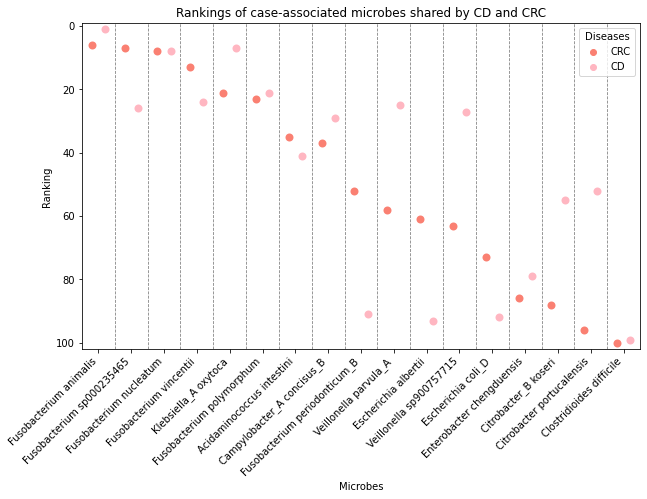

In [20]:
color_palette = ['salmon', 'lightpink']  # Change this to the desired colors

# Create a dot plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_CD_CRC_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

# Set y-axis limits from 1 to the maximum ranking
plt.ylim(-1, 102)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of case-associated microbes shared by CD and CRC')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
# Reverse the y-axis
plt.gca().invert_yaxis()
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_case_associated_CD_CRC_dots.pdf', bbox_inches="tight")

In [21]:
CD_CRC_overlap = set(CRC_decreased_100).intersection(set(CD_decreased_100))
CRC_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CRC/res_df.tsv', sep = '\t')
CRC_df["CI_95"] = CRC_df["log2FoldChange"] + CRC_df['lfcSE'] * 1.96
CRC_df["CI_5" ] = CRC_df["log2FoldChange"] - CRC_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CRC_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
CRC_df['Rank_in_CRC'] = rankings
CRC_df_filtered = CRC_df[CRC_df['#OTU ID'].isin(CD_CRC_overlap)]
CRC_df_filtered_new = CRC_df_filtered[['#OTU ID', 'Rank_in_CRC']]
new_column_name = 'Species'
CRC_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
CRC_df_filtered_new
CD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t')
CD_df["CI_95"] = CD_df["log2FoldChange"] + CD_df['lfcSE'] * 1.96
CD_df["CI_5" ] = CD_df["log2FoldChange"] - CD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = CD_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
CD_df['Rank_in_CD'] = rankings
CD_df_filtered = CD_df[CD_df['#OTU ID'].isin(CD_CRC_overlap)]
CD_df_filtered_new = CD_df_filtered[['#OTU ID', 'Rank_in_CD']]
new_column_name = 'Species'
CD_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
CD_CRC_df_merged = pd.merge(CRC_df_filtered_new, CD_df_filtered_new, left_on='Species', right_on = 'Species')
CD_CRC_df_merged = CD_CRC_df_merged.rename(columns={'Species': 'Microbes','Rank_in_CRC':'CRC','Rank_in_CD':'CD'})
sorted_CD_CRC_df_merged = CD_CRC_df_merged.sort_values(by=['CRC', 'CD'], ascending=True)
sorted_CD_CRC_df_merged
#sorted_CD_CRC_df_merged.to_csv('table/CD_CRC_overlap_increased.csv', index=False)
sorted_CD_CRC_df_merged_long = pd.melt(sorted_CD_CRC_df_merged, id_vars='Microbes', var_name='CRC', value_name='CD')
sorted_CD_CRC_df_merged_long = sorted_CD_CRC_df_merged_long.rename(columns={'CRC': 'Diseases','CD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/3516571024.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRC_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/3516571024.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/3516571024.py:30: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the fut

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/2528314079.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


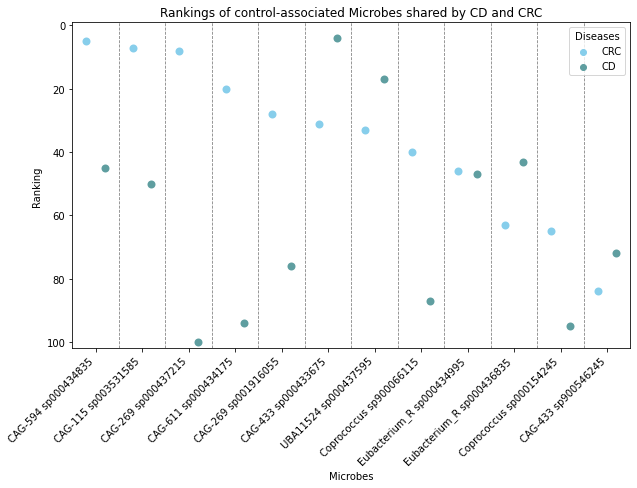

In [22]:
color_palette = ['skyblue', 'cadetblue']  # Change this to the desired colors

# Create a dot plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_CD_CRC_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

#sns.barplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_CD_CRC_df_merged_long, palette=color_palette)
plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of control-associated Microbes shared by CD and CRC')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
# Reverse the y-axis
plt.ylim(-1, 102)
plt.gca().invert_yaxis()
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_control_associated_CD_CRC_dots.pdf', bbox_inches="tight")

In [23]:
#PD T2D
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/PD/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

PD_increased = list(top_5['#OTU ID'].values)
PD_increased_100 = list(top_100['#OTU ID'].values)
PD_increased_15 = list(top_15['#OTU ID'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
PD_decreased_100 = list(bottom_100['#OTU ID'].values)

#T2D
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

T2D_increased = list(top_5['Species'].values)
T2D_increased_100 = list(top_100['Species'].values)
T2D_increased_15 = list(top_15['Species'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
T2D_decreased_100 = list(bottom_100['Species'].values)

In [24]:
PD_T2D_overlap = set(T2D_increased_100).intersection(set(PD_increased_100))
T2D_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t')
T2D_df["CI_95"] = T2D_df["log2FoldChange"] + T2D_df['lfcSE'] * 1.96
T2D_df["CI_5" ] = T2D_df["log2FoldChange"] - T2D_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = T2D_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
T2D_df['Rank_in_T2D'] = rankings
T2D_df_filtered = T2D_df[T2D_df['Species'].isin(PD_T2D_overlap)]
T2D_df_filtered_new = T2D_df_filtered[['Species', 'Rank_in_T2D']]

PD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/PD/res_df.tsv', sep = '\t')
PD_df["CI_95"] = PD_df["log2FoldChange"] + PD_df['lfcSE'] * 1.96
PD_df["CI_5" ] = PD_df["log2FoldChange"] - PD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = PD_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
PD_df['Rank_in_PD'] = rankings
PD_df_filtered = PD_df[PD_df['#OTU ID'].isin(PD_T2D_overlap)]
PD_df_filtered_new = PD_df_filtered[['#OTU ID', 'Rank_in_PD']]
PD_df_filtered_new.rename(columns={'#OTU ID': 'Species'}, inplace=True)
PD_T2D_df_merged = pd.merge(T2D_df_filtered_new, PD_df_filtered_new, on='Species')
PD_T2D_df_merged = PD_T2D_df_merged.rename(columns={'Species': 'Microbes', 'Rank_in_T2D': 'T2D','Rank_in_PD':'PD'})
sorted_PD_T2D_df_merged = PD_T2D_df_merged.sort_values(by=['T2D', 'PD'], ascending=True)
#sorted_PD_T2D_df_merged.to_csv('table/PD_T2D_overlap_increased.csv', index=False)
sorted_PD_T2D_df_merged_long = pd.melt(sorted_PD_T2D_df_merged, id_vars='Microbes', var_name='UC', value_name='PD')
sorted_PD_T2D_df_merged_long = sorted_PD_T2D_df_merged_long.rename(columns={'UC': 'Diseases', 'PD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1939436465.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD_df_filtered_new.rename(columns={'#OTU ID': 'Species'}, inplace=True)
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1939436465.py:26: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_PD_T2D_df_merged_long = pd.melt(sorted_PD_T2D_df_merged, id_vars='Microbes', var_name='UC', value_name='PD')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/4008518028.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


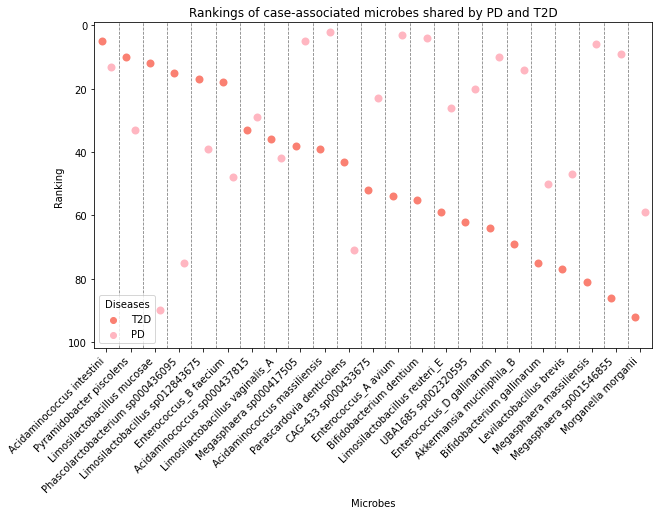

In [25]:
color_palette = ['salmon', 'lightpink']  # Change this to the desired colors
# Create a grouped bar plot using seaborn
#plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_PD_T2D_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of case-associated microbes shared by PD and T2D')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_case_associated_PD_T2D_dots.pdf', bbox_inches="tight")

In [26]:
PD_T2D_overlap = set(T2D_decreased_100).intersection(set(PD_decreased_100))
T2D_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t')
T2D_df["CI_95"] = T2D_df["log2FoldChange"] + T2D_df['lfcSE'] * 1.96
T2D_df["CI_5" ] = T2D_df["log2FoldChange"] - T2D_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = T2D_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
T2D_df['Rank_in_T2D'] = rankings
T2D_df_filtered = T2D_df[T2D_df['Species'].isin(PD_T2D_overlap)]
T2D_df_filtered_new = T2D_df_filtered[['Species', 'Rank_in_T2D']]

PD_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/PD/res_df.tsv', sep = '\t')
PD_df["CI_95"] = PD_df["log2FoldChange"] + PD_df['lfcSE'] * 1.96
PD_df["CI_5" ] = PD_df["log2FoldChange"] - PD_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = PD_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
PD_df['Rank_in_PD'] = rankings
PD_df_filtered = PD_df[PD_df['#OTU ID'].isin(PD_T2D_overlap)]
PD_df_filtered_new = PD_df_filtered[['#OTU ID', 'Rank_in_PD']]
new_column_name = 'Species'
PD_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
PD_T2D_df_merged = pd.merge(T2D_df_filtered_new, PD_df_filtered_new, left_on='Species', right_on = 'Species')
PD_T2D_df_merged = PD_T2D_df_merged.rename(columns={'Species': 'Microbes','Rank_in_T2D':'T2D','Rank_in_PD':'PD'})
sorted_PD_T2D_df_merged = PD_T2D_df_merged.sort_values(by=['T2D', 'PD'], ascending=True)
sorted_PD_T2D_df_merged
#sorted_PD_T2D_df_merged.to_csv('table/PD_T2D_overlap_increased.csv', index=False)
sorted_PD_T2D_df_merged_long = pd.melt(sorted_PD_T2D_df_merged, id_vars='Microbes', var_name='T2D', value_name='PD')
sorted_PD_T2D_df_merged_long = sorted_PD_T2D_df_merged_long.rename(columns={'T2D': 'Diseases','PD':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1324737532.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD_df_filtered_new.rename(columns={'#OTU ID': new_column_name}, inplace=True)
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1324737532.py:28: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_PD_T2D_df_merged_long = pd.melt(sorted_PD_T2D_df_merged, id_vars='Microbes', var_name='T2D', value_name='PD')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1666278052.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


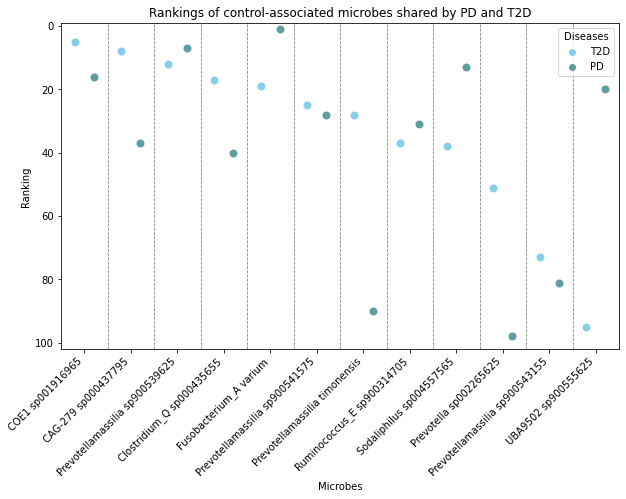

In [27]:
color_palette = ['skyblue', 'cadetblue']  # Change this to the desired colors

plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_PD_T2D_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of control-associated microbes shared by PD and T2D')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_control_associated_pd_t2d_dots.pdf', bbox_inches="tight")

In [29]:
#QinT2D
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 10 microbes
#top k microbes 
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

T2D_increased = list(top_5['Species'].values)
T2D_increased_100 = list(top_100['Species'].values)
T2D_increased_15 = list(top_15['Species'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
T2D_decreased_100 = list(bottom_100['Species'].values)

In [32]:
#Zhu_Schizophrenia
#res_df = pd.read_csv('deseq2_microbes/Zhu_Schizophrenia_deseq2.txt', sep = '\t') 
res_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/Schizophrenia/res_df.tsv', sep = '\t') 
res_df["CI_95"] = res_df["log2FoldChange"] + res_df['lfcSE'] * 1.96
res_df["CI_5" ] = res_df["log2FoldChange"] - res_df['lfcSE'] * 1.96
#sort by CI_5 and get the top 5 microbes
#top k microbes increased in CD: sort by 5% CI, the largest 5 species
top_5 = res_df.sort_values(by=['CI_5'],ascending=False).head(5)
top_100 = res_df.sort_values(by=['CI_5'],ascending=False).head(100)
top_15 = res_df.sort_values(by=['CI_5'],ascending=False).head(15)

Schizophrenia_increased = list(top_5['species'].values)
Schizophrenia_increased_100 = list(top_100['species'].values)
Schizophrenia_increased_15 = list(top_15['species'].values)

bottom_100 = res_df.sort_values(by=['CI_95'],ascending=True).head(100)
Schizophrenia_decreased_100 = list(bottom_100['species'].values)

In [33]:
T2D_Schizophrenia_overlap = set(Schizophrenia_decreased_100).intersection(set(T2D_decreased_100))
Schizophrenia_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/Schizophrenia/res_df.tsv', sep = '\t')
Schizophrenia_df["CI_95"] = Schizophrenia_df["log2FoldChange"] + Schizophrenia_df['lfcSE'] * 1.96
Schizophrenia_df["CI_5" ] = Schizophrenia_df["log2FoldChange"] - Schizophrenia_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = Schizophrenia_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
Schizophrenia_df['Rank_in_Schizophrenia'] = rankings
Schizophrenia_df_filtered = Schizophrenia_df[Schizophrenia_df['species'].isin(T2D_Schizophrenia_overlap)]
Schizophrenia_df_filtered_new = Schizophrenia_df_filtered[['species', 'Rank_in_Schizophrenia']]

T2D_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t')
T2D_df["CI_95"] = T2D_df["log2FoldChange"] + T2D_df['lfcSE'] * 1.96
T2D_df["CI_5" ] = T2D_df["log2FoldChange"] - T2D_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = T2D_df['CI_95'].rank(ascending=True)
# Create a new column with the rank values
T2D_df['Rank_in_T2D'] = rankings
T2D_df_filtered = T2D_df[T2D_df['Species'].isin(T2D_Schizophrenia_overlap)]
T2D_df_filtered_new = T2D_df_filtered[['Species', 'Rank_in_T2D']]
T2D_Schizophrenia_df_merged = pd.merge(Schizophrenia_df_filtered_new, T2D_df_filtered_new, left_on='species', right_on = 'Species')
T2D_Schizophrenia_df_merged = T2D_Schizophrenia_df_merged.rename(columns={'Species': 'Microbes','Rank_in_Schizophrenia':'Schizophrenia','Rank_in_T2D':'T2D'})
sorted_T2D_Schizophrenia_df_merged = T2D_Schizophrenia_df_merged.sort_values(by=['Schizophrenia', 'T2D'], ascending=True)
#sorted_T2D_Schizophrenia_df_merged.to_csv('table/T2D_Schizophrenia_overlap_increased.csv', index=False)
sorted_T2D_Schizophrenia_df_merged.drop('species', axis=1, inplace=True)
sorted_T2D_Schizophrenia_df_merged_long = pd.melt(sorted_T2D_Schizophrenia_df_merged, id_vars='Microbes', var_name='Schizophrenia', value_name='T2D')
sorted_T2D_Schizophrenia_df_merged_long = sorted_T2D_Schizophrenia_df_merged_long.rename(columns={'Schizophrenia': 'Diseases','T2D':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/2936850368.py:26: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_T2D_Schizophrenia_df_merged_long = pd.melt(sorted_T2D_Schizophrenia_df_merged, id_vars='Microbes', var_name='Schizophrenia', value_name='T2D')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/2283812766.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


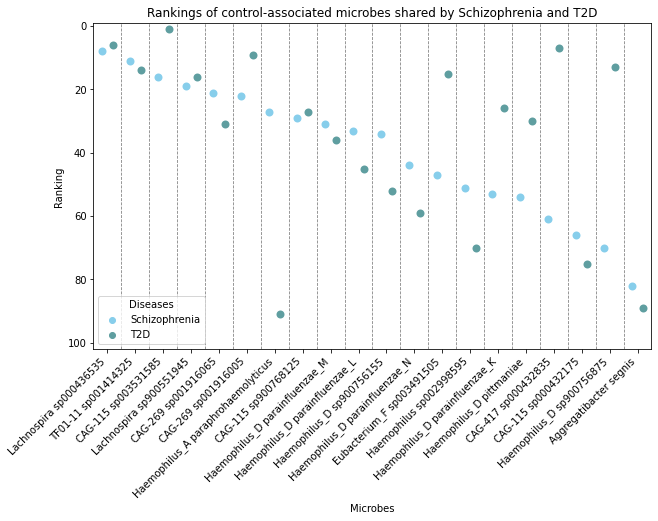

In [36]:
color_palette = ['skyblue', 'cadetblue']  # Change this to the desired colors
# Create a grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_T2D_Schizophrenia_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of control-associated microbes shared by Schizophrenia and T2D')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_control_associated_Schizophrenia_t2d_dots.pdf', bbox_inches="tight")

In [38]:
Schizophrenia_T2D_overlap = set(T2D_increased_100).intersection(set(Schizophrenia_increased_100))
T2D_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/T2D/res_df.tsv', sep = '\t')
T2D_df["CI_95"] = T2D_df["log2FoldChange"] + T2D_df['lfcSE'] * 1.96
T2D_df["CI_5" ] = T2D_df["log2FoldChange"] - T2D_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = T2D_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
T2D_df['Rank_in_T2D'] = rankings
T2D_df_filtered = T2D_df[T2D_df['Species'].isin(Schizophrenia_T2D_overlap)]
T2D_df_filtered_new = T2D_df_filtered[['Species', 'Rank_in_T2D']]
T2D_df_filtered_new
Schizophrenia_df = pd.read_csv('../../Meta_disease_Jun/Pydeseq2_microbes/Schizophrenia/res_df.tsv', sep = '\t')
Schizophrenia_df["CI_95"] = Schizophrenia_df["log2FoldChange"] + Schizophrenia_df['lfcSE'] * 1.96
Schizophrenia_df["CI_5" ] = Schizophrenia_df["log2FoldChange"] - Schizophrenia_df['lfcSE'] * 1.96
# Compute the rankings based on the 'Score' column
rankings = Schizophrenia_df['CI_5'].rank(ascending=False)
# Create a new column with the rank values
Schizophrenia_df['Rank_in_Schizophrenia'] = rankings
Schizophrenia_df_filtered = Schizophrenia_df[Schizophrenia_df['species'].isin(Schizophrenia_T2D_overlap)]
Schizophrenia_df_filtered_new = Schizophrenia_df_filtered[['species', 'Rank_in_Schizophrenia']]
Schizophrenia_T2D_df_merged = pd.merge(T2D_df_filtered_new, Schizophrenia_df_filtered_new, left_on='Species',right_on = 'species')
Schizophrenia_T2D_df_merged = Schizophrenia_T2D_df_merged.rename(columns={'Species': 'Microbes', 'Rank_in_T2D': 'T2D','Rank_in_Schizophrenia':'Schizophrenia'})
column_to_remove = 'species'
Schizophrenia_T2D_df_merged = Schizophrenia_T2D_df_merged.drop(columns=[column_to_remove])

sorted_Schizophrenia_T2D_df_merged = Schizophrenia_T2D_df_merged.sort_values(by=['T2D', 'Schizophrenia'], ascending=True)
#sorted_Schizophrenia_T2D_df_merged.to_csv('table/Schizophrenia_T2D_overlap_increased.csv', index=False)
sorted_Schizophrenia_T2D_df_merged_long = pd.melt(sorted_Schizophrenia_T2D_df_merged, id_vars='Microbes', var_name='T2D', value_name='Schizophrenia')
sorted_Schizophrenia_T2D_df_merged_long = sorted_Schizophrenia_T2D_df_merged_long.rename(columns={'T2D': 'Diseases', 'Schizophrenia':'Ranking'})

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/998027859.py:28: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sorted_Schizophrenia_T2D_df_merged_long = pd.melt(sorted_Schizophrenia_T2D_df_merged, id_vars='Microbes', var_name='T2D', value_name='Schizophrenia')


/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/769562647.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


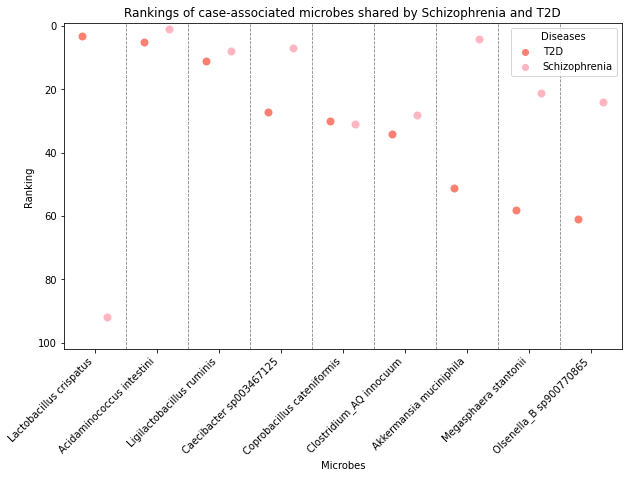

In [39]:
color_palette = ['salmon', 'lightpink']  # Change this to the desired colors
# Create a grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_Schizophrenia_T2D_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)
    
plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of case-associated microbes shared by Schizophrenia and T2D')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_case_associated_schizophrenia_T2D_dots.pdf', bbox_inches="tight")

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_66746/1208055259.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')


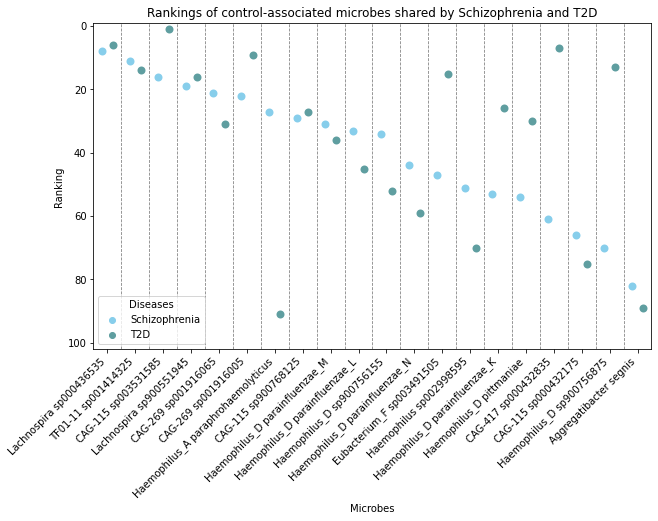

In [40]:
color_palette = ['skyblue', 'cadetblue']  # Change this to the desired colors
# Create a grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='Microbes', y='Ranking', hue='Diseases', data=sorted_T2D_Schizophrenia_df_merged_long, palette=color_palette, dodge=True, jitter=True, size=8)

# Add dashed lines between x-axis labels
for tick in ax.get_xticks():
    plt.axvline(tick + 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Microbes')
plt.ylabel('Ranking')
plt.title('Rankings of control-associated microbes shared by Schizophrenia and T2D')
plt.legend(title='Diseases')
plt.xticks(rotation=45)
plt.ylim(-1, 102)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')
plt.savefig('Rankings_control_associated_Schizophrenia_t2d_dots.pdf', bbox_inches="tight")